In [1]:
# Navigating to the project code directory

%cd /home/teamdaedulus/automatic-raga-recognition/src

/home/teamdaedulus/automatic-raga-recognition/src


#### Importing required packages

In [2]:
import torch
import torch.nn as nn
from torch.optim import Adam
import numpy as np
import matplotlib.pyplot as plt

#### Load preprocessed features for training

In [3]:
X_train = torch.from_numpy(np.load("../data/X_train.npy")).long()
Y_train = torch.from_numpy(np.load("../data/Y_train.npy")).long()
print(f"Training data: X - {X_train.shape}, Y - {Y_train.shape}")

Training data: X - torch.Size([18000, 5000]), Y - torch.Size([18000])


#### Set device to GPU if available

In [4]:
torch.cuda.empty_cache()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

#### Create PyTorch Dataloader

In [5]:
from train_utils import get_trainloader

batch_size = 40
trainloader = get_trainloader(X_train, Y_train, batch_size)
len(trainloader)

450

#### Create model instance

In [6]:
from deepSRGM import DeepSRGM

In [7]:
"""
Default parameters for DeepSRGM
    rnn='lstm',
    input_length=5000,
    embedding_size=128,
    hidden_size=768,
    num_layers=1,
    num_classes=10,
    vocab_size=209,
    drop_prob=0.3
"""
model = DeepSRGM(rnn='lstm').to(device)

/opt/anaconda3/envs/pipenv/lib/python3.7/site-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


#### Train the model on the Trainset

In [8]:
from train_utils import trainer

In [9]:
# Define Loss Criterion and the Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.0001)

In [10]:
losslist = trainer(trainloader, model, optimizer, criterion, epochs=30, device=device)

Epoch: 1 | Batches Done: 15/450 | Loss: 2.301
Epoch: 1 | Batches Done: 30/450 | Loss: 2.287
Epoch: 1 | Batches Done: 45/450 | Loss: 2.265
Epoch: 1 | Batches Done: 60/450 | Loss: 2.242
Epoch: 1 | Batches Done: 75/450 | Loss: 2.144
Epoch: 1 | Batches Done: 90/450 | Loss: 2.025
Epoch: 1 | Batches Done: 105/450 | Loss: 1.868
Epoch: 1 | Batches Done: 120/450 | Loss: 1.743
Epoch: 1 | Batches Done: 135/450 | Loss: 1.661
Epoch: 1 | Batches Done: 150/450 | Loss: 1.614
Epoch: 1 | Batches Done: 165/450 | Loss: 1.489
Epoch: 1 | Batches Done: 180/450 | Loss: 1.430
Epoch: 1 | Batches Done: 195/450 | Loss: 1.475
Epoch: 1 | Batches Done: 210/450 | Loss: 1.427
Epoch: 1 | Batches Done: 225/450 | Loss: 1.332
Epoch: 1 | Batches Done: 240/450 | Loss: 1.302
Epoch: 1 | Batches Done: 255/450 | Loss: 1.327
Epoch: 1 | Batches Done: 270/450 | Loss: 1.267
Epoch: 1 | Batches Done: 285/450 | Loss: 1.240
Epoch: 1 | Batches Done: 300/450 | Loss: 1.388
Epoch: 1 | Batches Done: 315/450 | Loss: 1.273
Epoch: 1 | Batches 

Epoch: 6 | Batches Done: 180/450 | Loss: 0.334
Epoch: 6 | Batches Done: 195/450 | Loss: 0.286
Epoch: 6 | Batches Done: 210/450 | Loss: 0.243
Epoch: 6 | Batches Done: 225/450 | Loss: 0.230
Epoch: 6 | Batches Done: 240/450 | Loss: 0.297
Epoch: 6 | Batches Done: 255/450 | Loss: 0.260
Epoch: 6 | Batches Done: 270/450 | Loss: 0.244
Epoch: 6 | Batches Done: 285/450 | Loss: 0.259
Epoch: 6 | Batches Done: 300/450 | Loss: 0.225
Epoch: 6 | Batches Done: 315/450 | Loss: 0.263
Epoch: 6 | Batches Done: 330/450 | Loss: 0.233
Epoch: 6 | Batches Done: 345/450 | Loss: 0.252
Epoch: 6 | Batches Done: 360/450 | Loss: 0.255
Epoch: 6 | Batches Done: 375/450 | Loss: 0.278
Epoch: 6 | Batches Done: 390/450 | Loss: 0.215
Epoch: 6 | Batches Done: 405/450 | Loss: 0.254
Epoch: 6 | Batches Done: 420/450 | Loss: 0.266
Epoch: 6 | Batches Done: 435/450 | Loss: 0.263
Epoch: 6 | Batches Done: 450/450 | Loss: 0.255
EPOCH 6 OVERALL LOSS: 0.273
Epoch: 7 | Batches Done: 15/450 | Loss: 0.261
Epoch: 7 | Batches Done: 30/450 |

Epoch: 11 | Batches Done: 330/450 | Loss: 0.142
Epoch: 11 | Batches Done: 345/450 | Loss: 0.139
Epoch: 11 | Batches Done: 360/450 | Loss: 0.163
Epoch: 11 | Batches Done: 375/450 | Loss: 0.158
Epoch: 11 | Batches Done: 390/450 | Loss: 0.144
Epoch: 11 | Batches Done: 405/450 | Loss: 0.137
Epoch: 11 | Batches Done: 420/450 | Loss: 0.148
Epoch: 11 | Batches Done: 435/450 | Loss: 0.129
Epoch: 11 | Batches Done: 450/450 | Loss: 0.146
EPOCH 11 OVERALL LOSS: 0.149
Epoch: 12 | Batches Done: 15/450 | Loss: 0.154
Epoch: 12 | Batches Done: 30/450 | Loss: 0.105
Epoch: 12 | Batches Done: 45/450 | Loss: 0.113
Epoch: 12 | Batches Done: 60/450 | Loss: 0.127
Epoch: 12 | Batches Done: 75/450 | Loss: 0.193
Epoch: 12 | Batches Done: 90/450 | Loss: 0.246
Epoch: 12 | Batches Done: 105/450 | Loss: 0.163
Epoch: 12 | Batches Done: 120/450 | Loss: 0.206
Epoch: 12 | Batches Done: 135/450 | Loss: 0.176
Epoch: 12 | Batches Done: 150/450 | Loss: 0.167
Epoch: 12 | Batches Done: 165/450 | Loss: 0.159
Epoch: 12 | Batch

Epoch: 16 | Batches Done: 435/450 | Loss: 0.136
Epoch: 16 | Batches Done: 450/450 | Loss: 0.108
EPOCH 16 OVERALL LOSS: 0.093
Epoch: 17 | Batches Done: 15/450 | Loss: 0.112
Epoch: 17 | Batches Done: 30/450 | Loss: 0.073
Epoch: 17 | Batches Done: 45/450 | Loss: 0.095
Epoch: 17 | Batches Done: 60/450 | Loss: 0.080
Epoch: 17 | Batches Done: 75/450 | Loss: 0.092
Epoch: 17 | Batches Done: 90/450 | Loss: 0.061
Epoch: 17 | Batches Done: 105/450 | Loss: 0.062
Epoch: 17 | Batches Done: 120/450 | Loss: 0.073
Epoch: 17 | Batches Done: 135/450 | Loss: 0.073
Epoch: 17 | Batches Done: 150/450 | Loss: 0.083
Epoch: 17 | Batches Done: 165/450 | Loss: 0.080
Epoch: 17 | Batches Done: 180/450 | Loss: 0.086
Epoch: 17 | Batches Done: 195/450 | Loss: 0.110
Epoch: 17 | Batches Done: 210/450 | Loss: 0.125
Epoch: 17 | Batches Done: 225/450 | Loss: 0.234
Epoch: 17 | Batches Done: 240/450 | Loss: 0.222
Epoch: 17 | Batches Done: 255/450 | Loss: 0.197
Epoch: 17 | Batches Done: 270/450 | Loss: 0.174
Epoch: 17 | Batch

Epoch: 22 | Batches Done: 60/450 | Loss: 0.071
Epoch: 22 | Batches Done: 75/450 | Loss: 0.058
Epoch: 22 | Batches Done: 90/450 | Loss: 0.078
Epoch: 22 | Batches Done: 105/450 | Loss: 0.056
Epoch: 22 | Batches Done: 120/450 | Loss: 0.076
Epoch: 22 | Batches Done: 135/450 | Loss: 0.073
Epoch: 22 | Batches Done: 150/450 | Loss: 0.052
Epoch: 22 | Batches Done: 165/450 | Loss: 0.093
Epoch: 22 | Batches Done: 180/450 | Loss: 0.046
Epoch: 22 | Batches Done: 195/450 | Loss: 0.054
Epoch: 22 | Batches Done: 210/450 | Loss: 0.063
Epoch: 22 | Batches Done: 225/450 | Loss: 0.062
Epoch: 22 | Batches Done: 240/450 | Loss: 0.080
Epoch: 22 | Batches Done: 255/450 | Loss: 0.071
Epoch: 22 | Batches Done: 270/450 | Loss: 0.081
Epoch: 22 | Batches Done: 285/450 | Loss: 0.092
Epoch: 22 | Batches Done: 300/450 | Loss: 0.055
Epoch: 22 | Batches Done: 315/450 | Loss: 0.044
Epoch: 22 | Batches Done: 330/450 | Loss: 0.093
Epoch: 22 | Batches Done: 345/450 | Loss: 0.076
Epoch: 22 | Batches Done: 360/450 | Loss: 0

Epoch: 27 | Batches Done: 165/450 | Loss: 0.079
Epoch: 27 | Batches Done: 180/450 | Loss: 0.079
Epoch: 27 | Batches Done: 195/450 | Loss: 0.055
Epoch: 27 | Batches Done: 210/450 | Loss: 0.053
Epoch: 27 | Batches Done: 225/450 | Loss: 0.093
Epoch: 27 | Batches Done: 240/450 | Loss: 0.067
Epoch: 27 | Batches Done: 255/450 | Loss: 0.055
Epoch: 27 | Batches Done: 270/450 | Loss: 0.067
Epoch: 27 | Batches Done: 285/450 | Loss: 0.075
Epoch: 27 | Batches Done: 300/450 | Loss: 0.094
Epoch: 27 | Batches Done: 315/450 | Loss: 0.080
Epoch: 27 | Batches Done: 330/450 | Loss: 0.091
Epoch: 27 | Batches Done: 345/450 | Loss: 0.050
Epoch: 27 | Batches Done: 360/450 | Loss: 0.062
Epoch: 27 | Batches Done: 375/450 | Loss: 0.081
Epoch: 27 | Batches Done: 390/450 | Loss: 0.052
Epoch: 27 | Batches Done: 405/450 | Loss: 0.045
Epoch: 27 | Batches Done: 420/450 | Loss: 0.067
Epoch: 27 | Batches Done: 435/450 | Loss: 0.052
Epoch: 27 | Batches Done: 450/450 | Loss: 0.039
EPOCH 27 OVERALL LOSS: 0.067
Epoch: 28 |

In [11]:
np.save("lstm_losslist_epochs.npy", losslist)

#### Plot training loss curve

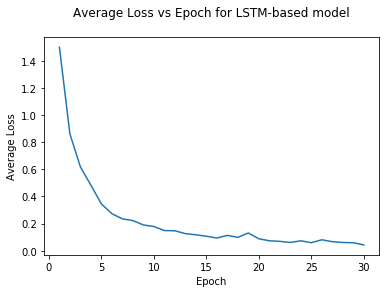

In [13]:
losslist = np.load("lstm_losslist_epochs.npy")
plt.plot(list(np.arange(1,len(losslist)+1)), losslist)
plt.title("Average Loss vs Epoch for LSTM-based model\n")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
# plt.savefig("plots/lstm_loss_plot.png")
plt.show()

## Modify and train a GRU-based model  

#### Create a modified model instance

In [7]:
model = DeepSRGM(rnn='gru').to(device)

/opt/anaconda3/envs/pipenv/lib/python3.7/site-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


#### Train the model on the Trainset

In [9]:
# Using same criterion and Optimizer, explicitly displayed
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.0001)

In [10]:
losslist = trainer(trainloader, model, optimizer, criterion,
                   epochs=30, device=device, modeltype='gru')

Epoch: 1 | Batches Done: 15/450 | Loss: 2.301
Epoch: 1 | Batches Done: 30/450 | Loss: 2.289
Epoch: 1 | Batches Done: 45/450 | Loss: 2.275
Epoch: 1 | Batches Done: 60/450 | Loss: 2.243
Epoch: 1 | Batches Done: 75/450 | Loss: 2.216
Epoch: 1 | Batches Done: 90/450 | Loss: 2.165
Epoch: 1 | Batches Done: 105/450 | Loss: 2.072
Epoch: 1 | Batches Done: 120/450 | Loss: 1.997
Epoch: 1 | Batches Done: 135/450 | Loss: 2.003
Epoch: 1 | Batches Done: 150/450 | Loss: 1.916
Epoch: 1 | Batches Done: 165/450 | Loss: 1.886
Epoch: 1 | Batches Done: 180/450 | Loss: 1.804
Epoch: 1 | Batches Done: 195/450 | Loss: 1.716
Epoch: 1 | Batches Done: 210/450 | Loss: 1.647
Epoch: 1 | Batches Done: 225/450 | Loss: 1.606
Epoch: 1 | Batches Done: 240/450 | Loss: 1.636
Epoch: 1 | Batches Done: 255/450 | Loss: 1.567
Epoch: 1 | Batches Done: 270/450 | Loss: 1.495
Epoch: 1 | Batches Done: 285/450 | Loss: 1.375
Epoch: 1 | Batches Done: 300/450 | Loss: 1.370
Epoch: 1 | Batches Done: 315/450 | Loss: 1.334
Epoch: 1 | Batches 

Epoch: 6 | Batches Done: 180/450 | Loss: 0.314
Epoch: 6 | Batches Done: 195/450 | Loss: 0.285
Epoch: 6 | Batches Done: 210/450 | Loss: 0.285
Epoch: 6 | Batches Done: 225/450 | Loss: 0.304
Epoch: 6 | Batches Done: 240/450 | Loss: 0.312
Epoch: 6 | Batches Done: 255/450 | Loss: 0.302
Epoch: 6 | Batches Done: 270/450 | Loss: 0.301
Epoch: 6 | Batches Done: 285/450 | Loss: 0.312
Epoch: 6 | Batches Done: 300/450 | Loss: 0.321
Epoch: 6 | Batches Done: 315/450 | Loss: 0.305
Epoch: 6 | Batches Done: 330/450 | Loss: 0.249
Epoch: 6 | Batches Done: 345/450 | Loss: 0.263
Epoch: 6 | Batches Done: 360/450 | Loss: 0.278
Epoch: 6 | Batches Done: 375/450 | Loss: 0.247
Epoch: 6 | Batches Done: 390/450 | Loss: 0.249
Epoch: 6 | Batches Done: 405/450 | Loss: 0.239
Epoch: 6 | Batches Done: 420/450 | Loss: 0.248
Epoch: 6 | Batches Done: 435/450 | Loss: 0.242
Epoch: 6 | Batches Done: 450/450 | Loss: 0.236
EPOCH 6 OVERALL LOSS: 0.283
Epoch: 7 | Batches Done: 15/450 | Loss: 0.262
Epoch: 7 | Batches Done: 30/450 |

Epoch: 11 | Batches Done: 330/450 | Loss: 0.138
Epoch: 11 | Batches Done: 345/450 | Loss: 0.098
Epoch: 11 | Batches Done: 360/450 | Loss: 0.197
Epoch: 11 | Batches Done: 375/450 | Loss: 0.148
Epoch: 11 | Batches Done: 390/450 | Loss: 0.096
Epoch: 11 | Batches Done: 405/450 | Loss: 0.141
Epoch: 11 | Batches Done: 420/450 | Loss: 0.169
Epoch: 11 | Batches Done: 435/450 | Loss: 0.155
Epoch: 11 | Batches Done: 450/450 | Loss: 0.133
EPOCH 11 OVERALL LOSS: 0.138
Epoch: 12 | Batches Done: 15/450 | Loss: 0.153
Epoch: 12 | Batches Done: 30/450 | Loss: 0.118
Epoch: 12 | Batches Done: 45/450 | Loss: 0.114
Epoch: 12 | Batches Done: 60/450 | Loss: 0.127
Epoch: 12 | Batches Done: 75/450 | Loss: 0.135
Epoch: 12 | Batches Done: 90/450 | Loss: 0.117
Epoch: 12 | Batches Done: 105/450 | Loss: 0.095
Epoch: 12 | Batches Done: 120/450 | Loss: 0.109
Epoch: 12 | Batches Done: 135/450 | Loss: 0.127
Epoch: 12 | Batches Done: 150/450 | Loss: 0.154
Epoch: 12 | Batches Done: 165/450 | Loss: 0.121
Epoch: 12 | Batch

Epoch: 16 | Batches Done: 435/450 | Loss: 0.066
Epoch: 16 | Batches Done: 450/450 | Loss: 0.080
EPOCH 16 OVERALL LOSS: 0.095
Epoch: 17 | Batches Done: 15/450 | Loss: 0.061
Epoch: 17 | Batches Done: 30/450 | Loss: 0.095
Epoch: 17 | Batches Done: 45/450 | Loss: 0.077
Epoch: 17 | Batches Done: 60/450 | Loss: 0.091
Epoch: 17 | Batches Done: 75/450 | Loss: 0.053
Epoch: 17 | Batches Done: 90/450 | Loss: 0.107
Epoch: 17 | Batches Done: 105/450 | Loss: 0.108
Epoch: 17 | Batches Done: 120/450 | Loss: 0.097
Epoch: 17 | Batches Done: 135/450 | Loss: 0.073
Epoch: 17 | Batches Done: 150/450 | Loss: 0.091
Epoch: 17 | Batches Done: 165/450 | Loss: 0.116
Epoch: 17 | Batches Done: 180/450 | Loss: 0.121
Epoch: 17 | Batches Done: 195/450 | Loss: 0.090
Epoch: 17 | Batches Done: 210/450 | Loss: 0.062
Epoch: 17 | Batches Done: 225/450 | Loss: 0.077
Epoch: 17 | Batches Done: 240/450 | Loss: 0.065
Epoch: 17 | Batches Done: 255/450 | Loss: 0.062
Epoch: 17 | Batches Done: 270/450 | Loss: 0.080
Epoch: 17 | Batch

Epoch: 22 | Batches Done: 60/450 | Loss: 0.069
Epoch: 22 | Batches Done: 75/450 | Loss: 0.051
Epoch: 22 | Batches Done: 90/450 | Loss: 0.061
Epoch: 22 | Batches Done: 105/450 | Loss: 0.066
Epoch: 22 | Batches Done: 120/450 | Loss: 0.058
Epoch: 22 | Batches Done: 135/450 | Loss: 0.042
Epoch: 22 | Batches Done: 150/450 | Loss: 0.069
Epoch: 22 | Batches Done: 165/450 | Loss: 0.042
Epoch: 22 | Batches Done: 180/450 | Loss: 0.046
Epoch: 22 | Batches Done: 195/450 | Loss: 0.054
Epoch: 22 | Batches Done: 210/450 | Loss: 0.074
Epoch: 22 | Batches Done: 225/450 | Loss: 0.068
Epoch: 22 | Batches Done: 240/450 | Loss: 0.051
Epoch: 22 | Batches Done: 255/450 | Loss: 0.037
Epoch: 22 | Batches Done: 270/450 | Loss: 0.062
Epoch: 22 | Batches Done: 285/450 | Loss: 0.053
Epoch: 22 | Batches Done: 300/450 | Loss: 0.041
Epoch: 22 | Batches Done: 315/450 | Loss: 0.083
Epoch: 22 | Batches Done: 330/450 | Loss: 0.059
Epoch: 22 | Batches Done: 345/450 | Loss: 0.043
Epoch: 22 | Batches Done: 360/450 | Loss: 0

Epoch: 27 | Batches Done: 165/450 | Loss: 0.065
Epoch: 27 | Batches Done: 180/450 | Loss: 0.042
Epoch: 27 | Batches Done: 195/450 | Loss: 0.039
Epoch: 27 | Batches Done: 210/450 | Loss: 0.031
Epoch: 27 | Batches Done: 225/450 | Loss: 0.041
Epoch: 27 | Batches Done: 240/450 | Loss: 0.041
Epoch: 27 | Batches Done: 255/450 | Loss: 0.063
Epoch: 27 | Batches Done: 270/450 | Loss: 0.038
Epoch: 27 | Batches Done: 285/450 | Loss: 0.062
Epoch: 27 | Batches Done: 300/450 | Loss: 0.049
Epoch: 27 | Batches Done: 315/450 | Loss: 0.040
Epoch: 27 | Batches Done: 330/450 | Loss: 0.033
Epoch: 27 | Batches Done: 345/450 | Loss: 0.041
Epoch: 27 | Batches Done: 360/450 | Loss: 0.061
Epoch: 27 | Batches Done: 375/450 | Loss: 0.042
Epoch: 27 | Batches Done: 390/450 | Loss: 0.042
Epoch: 27 | Batches Done: 405/450 | Loss: 0.043
Epoch: 27 | Batches Done: 420/450 | Loss: 0.041
Epoch: 27 | Batches Done: 435/450 | Loss: 0.054
Epoch: 27 | Batches Done: 450/450 | Loss: 0.044
EPOCH 27 OVERALL LOSS: 0.047
Epoch: 28 |

In [11]:
np.save("gru_losslist_epochs.npy", losslist)

#### Plot training loss curve

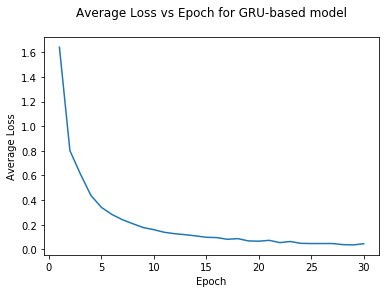

In [14]:
losslist = np.load("gru_losslist_epochs.npy")
plt.plot(list(np.arange(1,len(losslist)+1)), losslist)
plt.title("Average Loss vs Epoch for GRU-based model\n")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
# plt.savefig("plots/lstm_loss_plot.png")
plt.show()

## Training Comparison of LSTM vs GRU based models

#### Plot loss curve for comparison with LSTM

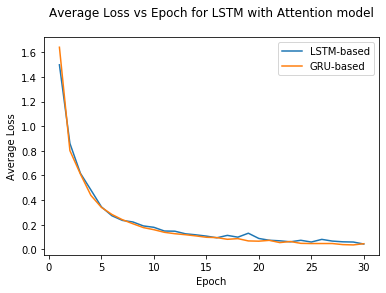

In [16]:
losslist_lstm = np.load('lstm_losslist_epochs.npy')
losslist_gru = np.load('gru_losslist_epochs.npy')

plt.plot(list(np.arange(1,len(losslist_lstm)+1)), losslist_lstm, label="LSTM-based")
plt.plot(list(np.arange(1,len(losslist_gru)+1)), losslist_gru, label="GRU-based")
plt.title("Average Loss vs Epoch for LSTM with Attention model\n")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.legend()
# plt.savefig("plots/comparison_loss_plot.png")
plt.show()

Observations:

* GRU trained about 20% faster (less time per epoch)
* GRU learning is smoother (less bumpy curve)
* GRU also learns faster (achieves same loss in fewer epochs)

Note: The last point was more prominently obtained in two other iterations of the same experiment (plot included in report)